* ruptures documentation: https://centre-borelli.github.io/ruptures-docs/
* The dataset can be accessed through this link: https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data
* If you are a learner, you can watch my tutorial video to understand what I did: https://youtu.be/l12CvaG2gDE
* another useful tutorial video about this library: https://www.youtube.com/watch?v=F9DvpHK3Kec

In [1]:
#!pip install ruptures

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

In [3]:
df = pd.read_csv(r"C:\Users\beytu\BAG_notebooks\Datasets\energy_consumption.csv")
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 4.3+ MB


In [5]:
df['period_duration_min'] = (pd.to_datetime(df['END TIME'], format='%H:%M') - pd.to_datetime(df['START TIME'], format='%H:%M')) / pd.Timedelta(minutes=1)
df.period_duration_min.describe()

count    70368.0
mean        14.0
std          0.0
min         14.0
25%         14.0
50%         14.0
75%         14.0
max         14.0
Name: period_duration_min, dtype: float64

In [6]:
df["time"] = pd.to_datetime(df['DATE'] + ' ' + df['START TIME'])
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,period_duration_min,time
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN,14.0,2016-10-22 00:00:00
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN,14.0,2016-10-22 00:15:00
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN,14.0,2016-10-22 00:30:00
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN,14.0,2016-10-22 00:45:00
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN,14.0,2016-10-22 01:00:00


In [7]:
df = df[["time", "USAGE"]]

In [8]:
df['next_data_time'] = df['time'].shift(-1)
df['next_diff_min'] = (df['next_data_time'] - df['time']) / pd.Timedelta(minutes=1)

In [9]:
df.head()

,time,USAGE,next_data_time,next_diff_min
0,2016-10-22 00:00:00,0.01,2016-10-22 00:15:00,15.0
1,2016-10-22 00:15:00,0.01,2016-10-22 00:30:00,15.0
2,2016-10-22 00:30:00,0.01,2016-10-22 00:45:00,15.0
3,2016-10-22 00:45:00,0.01,2016-10-22 01:00:00,15.0
4,2016-10-22 01:00:00,0.01,2016-10-22 01:15:00,15.0


In [10]:
df.next_diff_min.describe()

count    70367.000000
mean        15.000000
std          0.452376
min        -45.000000
25%         15.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: next_diff_min, dtype: float64

In [11]:
df[df.next_diff_min<15]

,time,USAGE,next_data_time,next_diff_min
1447,2016-11-06 01:45:00,0.03,2016-11-06 01:00:00,-45.0
36391,2017-11-05 01:45:00,0.02,2017-11-05 01:00:00,-45.0


In [12]:
df = pd.read_csv(r"C:\Users\beytu\BAG_notebooks\Datasets\energy_consumption.csv")
df["time"] = pd.to_datetime(df['DATE'] + ' ' + df['START TIME'])

df = df[["time", "USAGE"]]

df.sort_values('time', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df['next_data_time'] = df['time'].shift(-1)
df['next_diff_min'] = (df['next_data_time'] - df['time']) / pd.Timedelta(minutes=1)

df[df.next_diff_min<15]

,time,USAGE,next_data_time,next_diff_min
1444,2016-11-06 01:00:00,0.03,2016-11-06 01:00:00,0.0
1446,2016-11-06 01:15:00,0.03,2016-11-06 01:15:00,0.0
1448,2016-11-06 01:30:00,0.03,2016-11-06 01:30:00,0.0
1450,2016-11-06 01:45:00,0.03,2016-11-06 01:45:00,0.0
36388,2017-11-05 01:00:00,0.02,2017-11-05 01:00:00,0.0
36390,2017-11-05 01:15:00,0.02,2017-11-05 01:15:00,0.0
36392,2017-11-05 01:30:00,0.02,2017-11-05 01:30:00,0.0
36394,2017-11-05 01:45:00,0.02,2017-11-05 01:45:00,0.0


In [13]:
df.iloc[36385:36400]

,time,USAGE,next_data_time,next_diff_min
36385,2017-11-05 00:15:00,0.05,2017-11-05 00:30:00,15.0
36386,2017-11-05 00:30:00,0.05,2017-11-05 00:45:00,15.0
36387,2017-11-05 00:45:00,0.05,2017-11-05 01:00:00,15.0
36388,2017-11-05 01:00:00,0.02,2017-11-05 01:00:00,0.0
36389,2017-11-05 01:00:00,0.03,2017-11-05 01:15:00,15.0
36390,2017-11-05 01:15:00,0.02,2017-11-05 01:15:00,0.0
36391,2017-11-05 01:15:00,0.03,2017-11-05 01:30:00,15.0
36392,2017-11-05 01:30:00,0.02,2017-11-05 01:30:00,0.0
36393,2017-11-05 01:30:00,0.03,2017-11-05 01:45:00,15.0
36394,2017-11-05 01:45:00,0.02,2017-11-05 01:45:00,0.0


In [14]:
df.iloc[1440:1455]

,time,USAGE,next_data_time,next_diff_min
1440,2016-11-06 00:00:00,0.03,2016-11-06 00:15:00,15.0
1441,2016-11-06 00:15:00,0.03,2016-11-06 00:30:00,15.0
1442,2016-11-06 00:30:00,0.03,2016-11-06 00:45:00,15.0
1443,2016-11-06 00:45:00,0.03,2016-11-06 01:00:00,15.0
1444,2016-11-06 01:00:00,0.03,2016-11-06 01:00:00,0.0
1445,2016-11-06 01:00:00,0.02,2016-11-06 01:15:00,15.0
1446,2016-11-06 01:15:00,0.03,2016-11-06 01:15:00,0.0
1447,2016-11-06 01:15:00,0.02,2016-11-06 01:30:00,15.0
1448,2016-11-06 01:30:00,0.03,2016-11-06 01:30:00,0.0
1449,2016-11-06 01:30:00,0.02,2016-11-06 01:45:00,15.0


In [15]:
df["usage"] = df.groupby('time')['USAGE'].transform('mean')

In [16]:
df.iloc[36385:36400]

,time,USAGE,next_data_time,next_diff_min,usage
36385,2017-11-05 00:15:00,0.05,2017-11-05 00:30:00,15.0,0.050
36386,2017-11-05 00:30:00,0.05,2017-11-05 00:45:00,15.0,0.050
36387,2017-11-05 00:45:00,0.05,2017-11-05 01:00:00,15.0,0.050
36388,2017-11-05 01:00:00,0.02,2017-11-05 01:00:00,0.0,0.025
36389,2017-11-05 01:00:00,0.03,2017-11-05 01:15:00,15.0,0.025
36390,2017-11-05 01:15:00,0.02,2017-11-05 01:15:00,0.0,0.025
36391,2017-11-05 01:15:00,0.03,2017-11-05 01:30:00,15.0,0.025
36392,2017-11-05 01:30:00,0.02,2017-11-05 01:30:00,0.0,0.025
36393,2017-11-05 01:30:00,0.03,2017-11-05 01:45:00,15.0,0.025
36394,2017-11-05 01:45:00,0.02,2017-11-05 01:45:00,0.0,0.025


In [17]:
df.drop_duplicates('time', keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

df['next_data_time'] = df['time'].shift(-1)
df['next_diff_min'] = (df['next_data_time'] - df['time']) / pd.Timedelta(minutes=1)

df[df.next_diff_min<15]

,time,USAGE,next_data_time,next_diff_min,usage


In [18]:
df[df.next_diff_min>15]

,time,USAGE,next_data_time,next_diff_min,usage
13543,2017-03-12 01:45:00,0.09,2017-03-12 03:00:00,75.0,0.09
48483,2018-03-11 01:45:00,0.08,2018-03-11 03:00:00,75.0,0.08


In [19]:
df.iloc[13540:13545]

,time,USAGE,next_data_time,next_diff_min,usage
13540,2017-03-12 01:00:00,0.09,2017-03-12 01:15:00,15.0,0.09
13541,2017-03-12 01:15:00,0.09,2017-03-12 01:30:00,15.0,0.09
13542,2017-03-12 01:30:00,0.09,2017-03-12 01:45:00,15.0,0.09
13543,2017-03-12 01:45:00,0.09,2017-03-12 03:00:00,75.0,0.09
13544,2017-03-12 03:00:00,0.08,2017-03-12 03:15:00,15.0,0.08


In [20]:
df = df[["time", "USAGE"]]
df.set_index('time', inplace=True)
df = df.resample('15T').ffill()

In [21]:
df.loc[(df.index>='2017-03-12 01:30:00')&(df.index<='2017-03-12 03:15:00')]

,USAGE
time,
2017-03-12 01:30:00,0.09
2017-03-12 01:45:00,0.09
2017-03-12 02:00:00,0.09
2017-03-12 02:15:00,0.09
2017-03-12 02:30:00,0.09
2017-03-12 02:45:00,0.09
2017-03-12 03:00:00,0.08
2017-03-12 03:15:00,0.08


In [22]:
df.tail(8)

,USAGE
time,
2018-10-24 22:00:00,0.02
2018-10-24 22:15:00,0.02
2018-10-24 22:30:00,0.02
2018-10-24 22:45:00,0.02
2018-10-24 23:00:00,0.03
2018-10-24 23:15:00,0.03
2018-10-24 23:30:00,0.03
2018-10-24 23:45:00,0.03


In [23]:
df.describe()

,USAGE
count,70368.000000
mean,0.121947
std,0.210505
min,0.000000
25%,0.030000
50%,0.050000
75%,0.120000
max,2.360000


In [24]:
df.loc[df.USAGE==df.USAGE.max()]

,USAGE
time,
2017-12-30 17:00:00,2.36
2017-12-30 17:15:00,2.36
2017-12-30 17:30:00,2.36
2017-12-30 17:45:00,2.36


In [25]:
df = df.groupby(pd.Grouper(freq='H')).agg(np.sum)

In [26]:
df.reset_index(inplace=True)
df

,time,USAGE
0,2016-10-22 00:00:00,0.04
1,2016-10-22 01:00:00,0.04
2,2016-10-22 02:00:00,0.08
3,2016-10-22 03:00:00,0.04
4,2016-10-22 04:00:00,0.04
...,...,...
17587,2018-10-24 19:00:00,0.12
17588,2018-10-24 20:00:00,0.12
17589,2018-10-24 21:00:00,0.12
17590,2018-10-24 22:00:00,0.08


In [27]:
sub_df = df.loc[(df.time>='2017-12-28')&(df.time<='2018-01-01'), :].reset_index(drop=True)

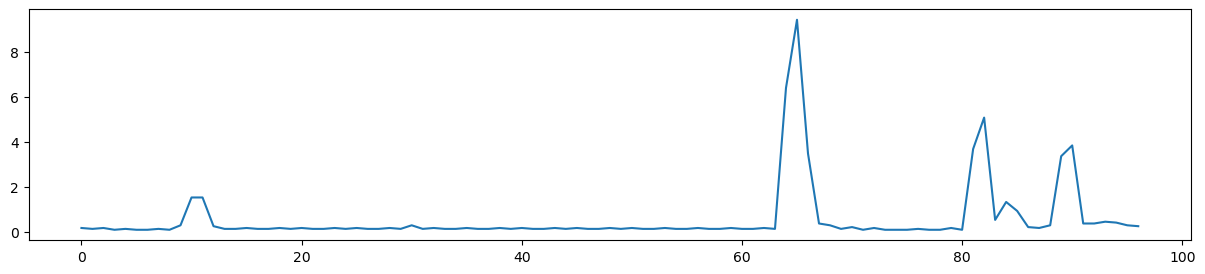

In [28]:
plt.figure(figsize=(15,3))
plt.plot(sub_df['USAGE'])

In [29]:
# Dynamic Programming method   /// known number of change points
algo_c = rpt.KernelCPD(kernel="linear", min_size=3).fit(sub_df['USAGE'].values)
result = algo_c.predict(n_bkps=7)

print(result)

[12, 64, 67, 81, 84, 89, 92, 97]


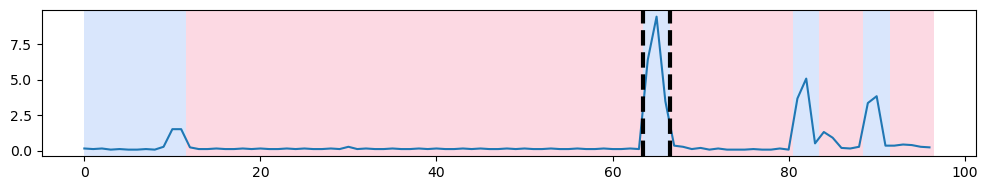

In [30]:
rpt.display(sub_df['USAGE'].values, result, result[1:3])
plt.show()

In [31]:
sub_df.iloc[result[:-1]]

,time,USAGE
12,2017-12-28 12:00:00,0.24
64,2017-12-30 16:00:00,6.40
67,2017-12-30 19:00:00,0.36
81,2017-12-31 09:00:00,3.68
84,2017-12-31 12:00:00,1.32
89,2017-12-31 17:00:00,3.36
92,2017-12-31 20:00:00,0.36


In [32]:
sub_df.iloc[62:69]

,time,USAGE
62,2017-12-30 14:00:00,0.16
63,2017-12-30 15:00:00,0.12
64,2017-12-30 16:00:00,6.40
65,2017-12-30 17:00:00,9.44
66,2017-12-30 18:00:00,3.48
67,2017-12-30 19:00:00,0.36
68,2017-12-30 20:00:00,0.28


In [33]:
#PELT method   /// unknown number of change points
algo_c = rpt.KernelCPD(kernel="rbf", min_size=3).fit(sub_df['USAGE'].values)
result = algo_c.predict(pen=2)

print(result)

[9, 13, 64, 69, 81, 97]


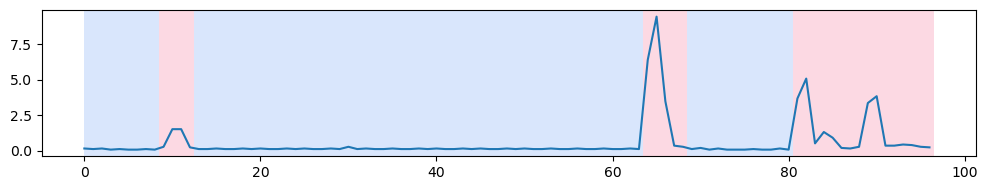

In [34]:
rpt.display(sub_df['USAGE'].values, result)
plt.show()

In [35]:
sub_df.iloc[result[:-1]]

,time,USAGE
9,2017-12-28 09:00:00,0.28
13,2017-12-28 13:00:00,0.12
64,2017-12-30 16:00:00,6.40
69,2017-12-30 21:00:00,0.12
81,2017-12-31 09:00:00,3.68
